In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../course_notebooks/DATA/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

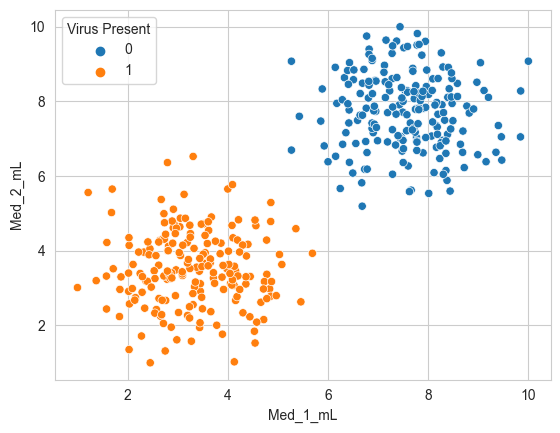

In [5]:
sns.scatterplot(df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

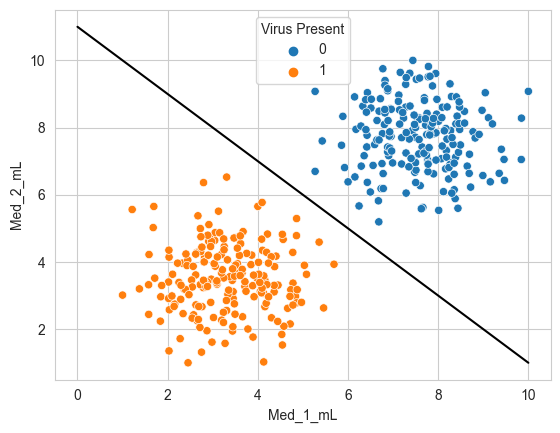

In [10]:
sns.scatterplot(df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')
# hyperplane (2d -> line)
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x+b
plt.plot(x,y,'black')

In [12]:
from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [14]:
x = df.drop('Virus Present',axis=1)
y = df['Virus Present']
model = SVC(kernel='linear',C=1000)
model.fit(x,y)

SVC(C=1000, kernel='linear')

In [15]:
from svm_margin_plot import plot_svm_boundary

F:\Dev\python\course\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


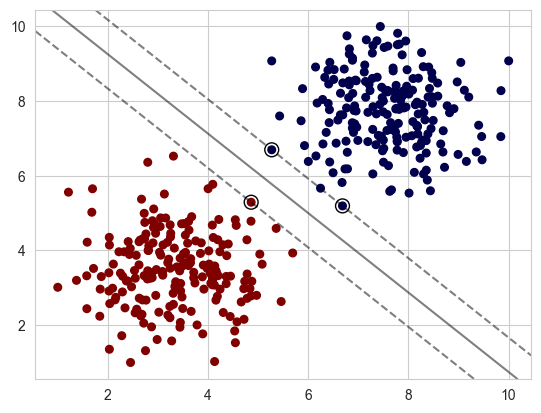

In [16]:
plot_svm_boundary(model,x,y)

F:\Dev\python\course\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


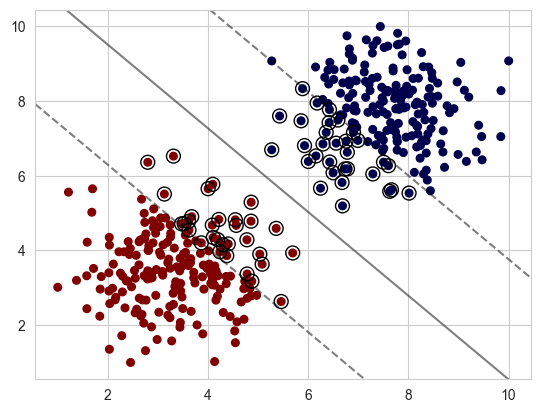

In [19]:
model = SVC(kernel='linear',C=0.005)
model.fit(x,y)
plot_svm_boundary(model,x,y)

F:\Dev\python\course\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


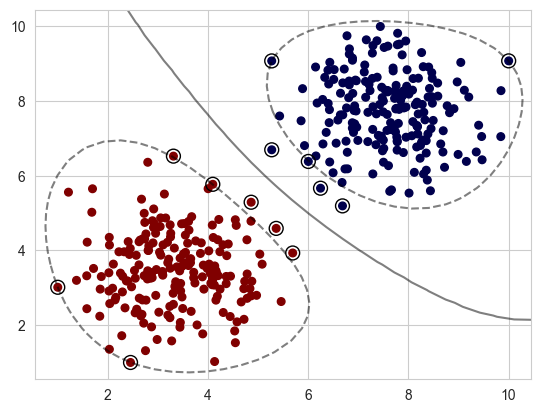

In [21]:
model = SVC(kernel='rbf',C=1)
model.fit(x,y)
plot_svm_boundary(model,x,y)

F:\Dev\python\course\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


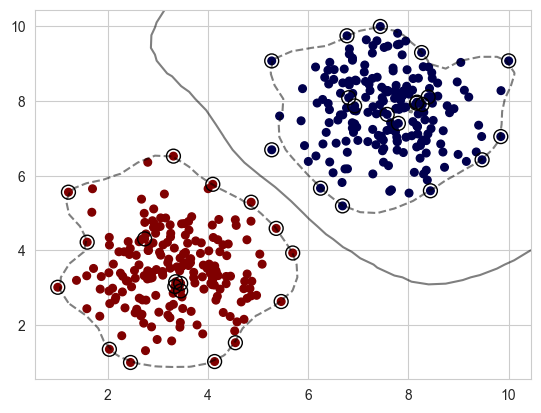

In [26]:
model = SVC(kernel='rbf',C=1,gamma='auto')
model.fit(x,y)
plot_svm_boundary(model,x,y)

F:\Dev\python\course\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


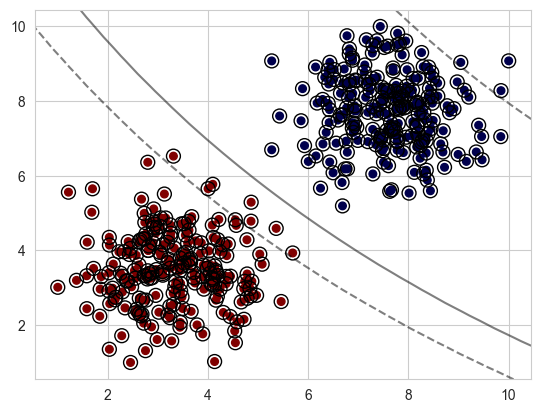

In [29]:
model = SVC(kernel='sigmoid')
model.fit(x,y)
plot_svm_boundary(model,x,y)

F:\Dev\python\course\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


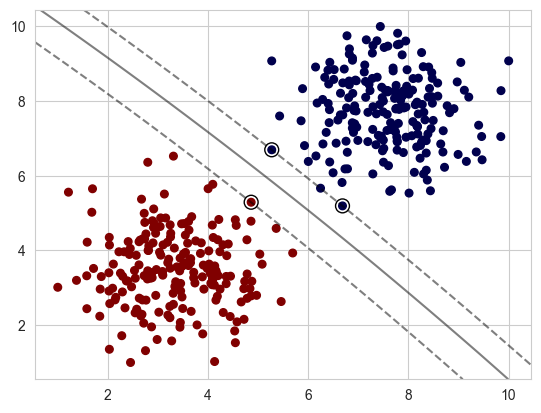

In [46]:
model = SVC(kernel='poly')
model.fit(x,y)
plot_svm_boundary(model,x,y)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [49]:
grid.best_params_


{'C': 0.01, 'kernel': 'linear'}